# Merging lyrics into the final dataset

In [1]:
import pandas as pd

In [5]:
df = pd.read_csv("data/ds2.csv")

In [29]:
fds = pd.read_csv("data/final_dataset.csv")

In [7]:
df.head()

,title,tag,artist,year,views,features,lyrics,id
0,Killa Cam,rap,Cam'ron,2004,173166,"{""Cam\\'ron"",""Opera Steve""}","[Chorus: Opera Steve & Cam'ron]\nKilla Cam, Ki...",1
1,Can I Live,rap,JAY-Z,1996,468624,{},"[Produced by Irv Gotti]\n\n[Intro]\nYeah, hah,...",3
2,Forgive Me Father,rap,Fabolous,2003,4743,{},Maybe cause I'm eatin\nAnd these bastards fien...,4
3,Down and Out,rap,Cam'ron,2004,144404,"{""Cam\\'ron"",""Kanye West"",""Syleena Johnson""}",[Produced by Kanye West and Brian Miller]\n\n[...,5
4,Fly In,rap,Lil Wayne,2005,78271,{},"[Intro]\nSo they ask me\n""Young boy\nWhat you ...",6


In [58]:
fds.columns

Index(['track_name', 'artists', 'album_name', 'popularity', 'duration_ms',
       'explicit', 'danceability', 'energy', 'key', 'loudness', 'mode',
       'speechiness', 'acousticness', 'instrumentalness', 'liveness',
       'valence', 'tempo', 'time_signature', 'track_genre', 'playlistname',
       'source', 'domain', 'chart', 'region', 'date', 'position', 'title',
       'artist', 'url', 'scraped_at'],
      dtype='object')

In [ ]:
df = df.drop(labels=["tag","year","views","id","features"], axis=1)

In [25]:
df.columns

Index(['title', 'artist', 'lyrics'], dtype='object')

In [32]:
merged = fds.merge(
    df,
    left_on=['track_name', 'artist'],
    right_on=['title', 'artist'],
    how='left'
)


In [41]:
merged.columns

Index(['track_name', 'artists', 'album_name', 'popularity', 'duration_ms',
       'explicit', 'danceability', 'energy', 'key', 'loudness', 'mode',
       'speechiness', 'acousticness', 'instrumentalness', 'liveness',
       'valence', 'tempo', 'time_signature', 'track_genre', 'playlistname',
       'source', 'domain', 'chart', 'region', 'date', 'position', 'title_x',
       'artist', 'url', 'scraped_at', 'title_y', 'lyrics'],
      dtype='object')

In [54]:
merged = merged.drop("title_y", axis=1)
merged = merged.rename(columns={'title_x': 'title'})

In [55]:
merged.columns

Index(['track_name', 'artists', 'album_name', 'popularity', 'duration_ms',
       'explicit', 'danceability', 'energy', 'key', 'loudness', 'mode',
       'speechiness', 'acousticness', 'instrumentalness', 'liveness',
       'valence', 'tempo', 'time_signature', 'track_genre', 'playlistname',
       'source', 'domain', 'chart', 'region', 'date', 'position', 'title',
       'artist', 'url', 'scraped_at', 'lyrics'],
      dtype='object')

In [56]:
merged.isna().sum()

track_name            0
artists               0
album_name            0
popularity            0
duration_ms           0
explicit              0
danceability          0
energy                0
key                   0
loudness              0
mode                  0
speechiness           0
acousticness          0
instrumentalness      0
liveness              0
valence               0
tempo                 0
time_signature        0
track_genre           0
playlistname          0
source                0
domain                0
chart                 0
region              528
date                 82
position              0
title                 0
artist                1
url                 559
scraped_at            0
lyrics              305
dtype: int64

Half of the lyrics are still missing

In [59]:
import lyricsgenius
import time

genius = lyricsgenius.Genius("Dm_OS9PJm_1854rqdgXQX2BbTRjTb6pQ0kVScZUChIn8eoUvtzKKgjQPC88DuomX")
genius.verbose = False
genius.remove_section_headers = True

def get_lyrics(track_name, artist_name):
    try:
        time.sleep(1)  # avoid rate limit
        song = genius.search_song(track_name, artist_name)
        if song:
            return song.lyrics
        return None
    except Exception as e:
        print(f"--- Error fetching lyrics for {track_name}: {e}")
        return None


In [69]:
# apply only to missing lyrics
missing_mask = merged['lyrics'].isna()
merged.loc[missing_mask, 'lyrics'] = merged.loc[missing_mask].apply(
    lambda row: get_lyrics(row['title'], row['artist']),
    axis=1
)

--- Error fetching lyrics for The Christmas Song (Merry Christmas To You): Request timed out:
HTTPSConnectionPool(host='api.genius.com', port=443): Read timed out. (read timeout=5)


In [68]:
merged.isna().sum()

track_name            0
artists               0
album_name            0
popularity            0
duration_ms           0
explicit              0
danceability          0
energy                0
key                   0
loudness              0
mode                  0
speechiness           0
acousticness          0
instrumentalness      0
liveness              0
valence               0
tempo                 0
time_signature        0
track_genre           0
playlistname          0
source                0
domain                0
chart                 0
region              528
date                 82
position              0
title                 0
artist                1
url                 559
scraped_at            0
lyrics               25
dtype: int64

Still 9 lyrics missing

In [74]:
merged[merged['lyrics'].isna()]

,track_name,artists,album_name,popularity,duration_ms,explicit,danceability,energy,key,loudness,...,domain,chart,region,date,position,title,artist,url,scraped_at,lyrics
8,The Christmas Song (Merry Christmas To You),Nat King Cole,World's Best Christmas Playlist,1,192160,False,0.320,0.210,6,-15.231,...,billboard.com,hot-100,NaN,2024-01-06,12,The Christmas Song (Merry Christmas To You),"Nat ""King"" Cole",NaN,2025-11-22T14:54:46.536981+00:00,None
9,Jingle Bells,Brian Culbertson,Happy Christmas Instrumentals,0,251506,False,0.664,0.744,0,-8.318,...,billboard.com,hot-100,NaN,2024-01-06,16,Jingle Bells,Frank Sinatra With The Orchestra & Chorus Of G...,NaN,2025-11-22T14:54:46.536981+00:00,None
60,Linus And Lucy,Vince Guaraldi Trio,Best Christmas Playlist Ever 2022,0,185453,False,0.497,0.386,8,-14.177,...,billboard.com,hot-100,NaN,2022-01-01,37,Linus And Lucy (Peanuts Theme),Vince Guaraldi Trio,NaN,2025-11-22T15:10:20.303946+00:00,None
299,El Perdón (with Enrique Iglesias),Nicky Jam;Enrique Iglesias,Fénix,74,205906,False,0.628,0.690,8,-5.830,...,billboard.com,hot-100,NaN,2015-06-06,87,El Perdon (Forgiveness),Nicky Jam & Enrique Iglesias,NaN,2025-11-22T16:41:24.543250+00:00,None
338,It Ain't Me (with Selena Gomez),Kygo;Selena Gomez,It Ain't Me (with Selena Gomez),77,220780,False,0.640,0.533,0,-6.596,...,billboard.com,hot-100,NaN,2017-06-03,12,It Ain't Me,Kygo x Selena Gomez,NaN,2025-11-22T16:45:13.029007+00:00,None
356,I Don’t Wanna Live Forever (Fifty Shades Darker),ZAYN;Taylor Swift,reputation Stadium Tour Surprise Song Playlist,80,247160,False,0.731,0.445,0,-8.418,...,billboard.com,hot-100,NaN,2017-06-03,48,I Don't Wanna Live Forever (Fifty Shades Darker),ZAYN / Taylor Swift,NaN,2025-11-22T16:45:13.029007+00:00,None
439,Calma,Gerson Rufino,Bachata (Edição Histórica),38,198020,False,0.822,0.809,5,-3.703,...,billboard.com,hot-100,NaN,2019-06-01,96,Calma,Pedro Capo X Farruko,NaN,2025-11-22T16:49:02.534815+00:00,None
452,Nobody But You (Duet with Gwen Stefani),Blake Shelton;Gwen Stefani,Fully Loaded: God's Country,66,194866,False,0.463,0.653,0,-5.515,...,billboard.com,hot-100,NaN,2020-06-06,28,Nobody But You,Blake Shelton Duet With Gwen Stefani,NaN,2025-11-22T16:50:54.449032+00:00,None
475,Genesis,E-Force;Luna,Genesis,24,154776,False,0.553,0.972,7,-2.650,...,billboard.com,billboard-200,NaN,2025-11-08,169,Genesis,Peso Pluma,NaN,2025-11-10T11:31:16.010845+00:00,None


In [76]:
# apply only to missing lyrics only on title
missing_mask = merged['lyrics'].isna()
merged.loc[missing_mask, 'lyrics'] = merged.loc[missing_mask].apply(
    lambda row: get_lyrics(row['title'], ""),
    axis=1
)

--- Error fetching lyrics for The Christmas Song (Merry Christmas To You): Request timed out:
HTTPSConnectionPool(host='api.genius.com', port=443): Read timed out. (read timeout=5)
--- Error fetching lyrics for Genesis: Request timed out:
HTTPSConnectionPool(host='genius.com', port=443): Read timed out. (read timeout=5)


Only 3 missing

In [85]:
df.loc[7, 'lyrics']

'[Verse 1: Cam\'ron]\nKilla, Dipset\nMan I spit that pimp talk, you hang out where the pimps collide\nIt\'s a pimp in my ride, no need to pimp the ride\nThis ain\'t the pimp camp: pimp limp, pimp stance\nPimp-slap a slim tramp, order steak, shrimp scamp\nOk-k-kay, you g-g-gay\nI\'ll soufflé ya toupée and bottles be a bouquet\nRight where you stay, or where you stayed\nThat .45 trey deuce spade sprayed, you stayed\nUnload the click-clack to ya fit cap\nHold the shit back, say goodbye and go commit that\nFor 9 years in Spain had the time share\nBack to Times Square...I got dimes here\nBy the Port Authority, but I got more authority\nYour girl she ordered Mauri, checks she forge \'em for me\nReporters report me how she report to the orgy\nBut it\'s more to the story: her daughter applaud me\n\n[Chorus: Nicole Wray & Cam\'ron]\nWe in a zone, our soldiers like to stand by\nNever alone we \'bout to make the drums cry\nDipset, Dipset, Dipset, Dipset, Dipset, Dipset\nWe hold our own, don\'t th

In [77]:
merged[merged['lyrics'].isna()]

,track_name,artists,album_name,popularity,duration_ms,explicit,danceability,energy,key,loudness,...,domain,chart,region,date,position,title,artist,url,scraped_at,lyrics
8,The Christmas Song (Merry Christmas To You),Nat King Cole,World's Best Christmas Playlist,1,192160,False,0.320,0.210,6,-15.231,...,billboard.com,hot-100,NaN,2024-01-06,12,The Christmas Song (Merry Christmas To You),"Nat ""King"" Cole",NaN,2025-11-22T14:54:46.536981+00:00,None
60,Linus And Lucy,Vince Guaraldi Trio,Best Christmas Playlist Ever 2022,0,185453,False,0.497,0.386,8,-14.177,...,billboard.com,hot-100,NaN,2022-01-01,37,Linus And Lucy (Peanuts Theme),Vince Guaraldi Trio,NaN,2025-11-22T15:10:20.303946+00:00,None
475,Genesis,E-Force;Luna,Genesis,24,154776,False,0.553,0.972,7,-2.650,...,billboard.com,billboard-200,NaN,2025-11-08,169,Genesis,Peso Pluma,NaN,2025-11-10T11:31:16.010845+00:00,None


In [86]:
merged.loc[merged["track_name"] == "The Christmas Song (Merry Christmas To You)", "lyrics"] = get_lyrics("The Christmas Song ", "")

The 2 remaining songs don't have lyrics (instrumental only)

In [91]:
merged.to_csv("data/dataset_lyrics.csv", index=False)

# Adding a happiness score from lyrics using a prebuilt model

In [93]:
import re

def clean_lyrics(text):
    if pd.isna(text):
        return ""
    text = re.sub(r'\[.*?\]', '', text)
    text = text.replace('\n', ' ').replace('\r', ' ')
    text = re.sub(r'\s+', ' ', text)
    return text.strip()

In [94]:
d_lyrics = merged.copy()
d_lyrics['lyrics_clean'] = d_lyrics['lyrics'].apply(clean_lyrics)

In [ ]:
from transformers import AutoTokenizer, AutoModelForSequenceClassification
import torch
import numpy as np

model_name = "nlptown/bert-base-multilingual-uncased-sentiment"
tokenizer = AutoTokenizer.from_pretrained(model_name)
model = AutoModelForSequenceClassification.from_pretrained(model_name)
model.eval()  


BertForSequenceClassification(
  (bert): BertModel(
    (embeddings): BertEmbeddings(
      (word_embeddings): Embedding(105879, 768, padding_idx=0)
      (position_embeddings): Embedding(512, 768)
      (token_type_embeddings): Embedding(2, 768)
      (LayerNorm): LayerNorm((768,), eps=1e-12, elementwise_affine=True)
      (dropout): Dropout(p=0.1, inplace=False)
    )
    (encoder): BertEncoder(
      (layer): ModuleList(
        (0-11): 12 x BertLayer(
          (attention): BertAttention(
            (self): BertSdpaSelfAttention(
              (query): Linear(in_features=768, out_features=768, bias=True)
              (key): Linear(in_features=768, out_features=768, bias=True)
              (value): Linear(in_features=768, out_features=768, bias=True)
              (dropout): Dropout(p=0.1, inplace=False)
            )
            (output): BertSelfOutput(
              (dense): Linear(in_features=768, out_features=768, bias=True)
              (LayerNorm): LayerNorm((768,), eps=1

In [106]:
def get_happiness_chunks(text, max_tokens=512):
    words = text.split()
    chunk_size = 200  # ~200 words per chunk; will truncate inside tokenizer
    
    scores = []
    for i in range(0, len(words), chunk_size):
        chunk_text = " ".join(words[i:i+chunk_size])
        
        # Tokenize chunk with truncation
        inputs = tokenizer(
            chunk_text,
            truncation=True,
            padding=True,
            max_length=max_tokens,
            return_tensors="pt"
        )
        
        with torch.no_grad():
            outputs = model(**inputs)
            logits = outputs.logits
            probs = torch.softmax(logits, dim=1).squeeze()
            # Convert logits to stars: 0 -> 1 star, 4 -> 5 stars
            star_score = sum((i+1)*probs[i].item() for i in range(len(probs)))
            # Normalize to 0-1
            happiness = (star_score - 1)/4
            scores.append(happiness)
    
    return np.mean(scores)


In [107]:
merged['happiness_from_lyrics'] = d_lyrics['lyrics_clean'].apply(get_happiness_chunks)

C:\Users\tomfo\AppData\Roaming\Python\Python313\site-packages\numpy\_core\fromnumeric.py:3904: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
C:\Users\tomfo\AppData\Roaming\Python\Python313\site-packages\numpy\_core\_methods.py:147: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)


In [108]:
merged.head()

,track_name,artists,album_name,popularity,duration_ms,explicit,danceability,energy,key,loudness,...,chart,region,date,position,title,artist,url,scraped_at,lyrics,happiness_from_lyrics
0,Daisies,Weston Estate,Maggie Valley,55,203293,False,0.640,0.416,2,-7.897,...,hot-100,NaN,2025-11-08,6,Daisies,Justin Bieber,NaN,2025-11-10T11:27:47.429636+00:00,"Throwin' petals like, ""Do you love me or not?""...",0.674589
1,Thriller,Michael Jackson,Scream,70,358053,False,0.764,0.887,11,-3.726,...,hot-100,NaN,2025-11-08,32,Thriller,Michael Jackson,NaN,2025-11-10T11:27:47.429636+00:00,[Verse 1]\nIt's close to midnight\nSomething e...,0.614948
2,This Is Halloween,The Countdown Kids,Halloween Movie & TV Classics,0,194193,False,0.644,0.644,5,-5.057,...,hot-100,NaN,2025-11-08,47,This Is Halloween,The Citizens of Halloween,NaN,2025-11-10T11:27:47.429636+00:00,Boys and girls of every age\nWouldn't you like...,0.759576
3,Rockin' Around The Christmas Tree,Brenda Lee,Country Christmas Greatest Hits,1,124906,False,0.708,0.593,8,-6.167,...,hot-100,NaN,2024-01-06,1,Rockin' Around The Christmas Tree,Brenda Lee,NaN,2025-11-22T14:54:46.536981+00:00,Rockin' around the Christmas tree\nAt the Chri...,0.784147
4,Jingle Bell Rock,Blake Shelton,Merry Christmas,1,123400,False,0.650,0.736,0,-5.222,...,hot-100,NaN,2024-01-06,3,Jingle Bell Rock,Bobby Helms,NaN,2025-11-22T14:54:46.536981+00:00,"[Verse 1]\nJingle bell, jingle bell, jingle be...",0.681195


In [111]:
happiest_song = merged.loc[merged['happiness_from_lyrics'].idxmin()]
print(happiest_song)

track_name                                                   Wasted On You
artists                                                      Morgan Wallen
album_name                                     Dangerous: The Double Album
popularity                                                              83
duration_ms                                                         178520
explicit                                                             False
danceability                                                         0.505
energy                                                               0.657
key                                                                     11
loudness                                                             -5.24
mode                                                                     0
speechiness                                                         0.0318
acousticness                                                         0.373
instrumentalness         

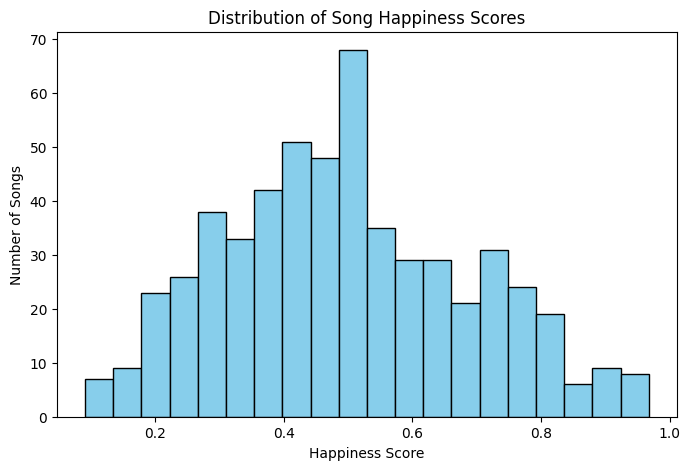

In [109]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8,5))
plt.hist(merged['happiness_from_lyrics'], bins=20, color='skyblue', edgecolor='black')
plt.title('Distribution of Song Happiness Scores')
plt.xlabel('Happiness Score')
plt.ylabel('Number of Songs')
plt.show()

In [112]:
merged.to_csv("data/dataset_lyrics.csv", index=False)